In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [3]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.00,NaN,513,4.0,DPM,NaN,14.93,CuZnAl-3,90.0,0.19,...,NaN,NaN,Al2O3,0.6639,17.4,NaN,1.5625,NaN,54.2,NaN
1,3.03,NaN,513,4.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,59.8,NaN,5.6700,NaN,73.9,NaN
2,3.03,NaN,533,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,58.2,NaN,4.6242,NaN,62.5,NaN
3,3.03,NaN,513,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,49.9,NaN,4.0900,NaN,64.5,NaN
4,3.03,NaN,513,2.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,40.0,NaN,6.7662,NaN,54.1,NaN


# DATA PREPROCESSING/FEATURE ENGG

In [4]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.67,13.3,31.6,0.2340,0.102,NaN,0.6639,17.4,1.5625,54.2
1,3.03,513,4.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,59.8,5.6700,73.9
2,3.03,533,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,58.2,4.6242,62.5
3,3.03,513,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,49.9,4.0900,64.5
4,3.03,513,2.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,40.0,6.7662,54.1


In [5]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

# Handling Null Values

In [6]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [7]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.67,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.4,1.5625,54.2
1,3.03,513,4.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.2830,0.0,0.0790,59.8,5.6700,73.9
2,3.03,533,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.2830,0.0,0.0790,58.2,4.6242,62.5
3,3.03,513,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.2830,0.0,0.0790,49.9,4.0900,64.5
4,3.03,513,2.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.2830,0.0,0.0790,40.0,6.7662,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,IWI,2.99,NaN,NaN,NaN,14.1,NaN,0.0900,0.0000,0.0,0.9100,NaN,NaN,24.0
364,4.00,573,4.0,IWI,2.99,NaN,NaN,NaN,14.8,NaN,0.0900,0.0415,0.0,0.8685,NaN,18.3600,61.0
365,4.00,573,4.0,IWI,2.99,NaN,NaN,NaN,9.8,NaN,0.0900,0.0830,0.0,0.8270,NaN,NaN,42.0
366,4.00,573,4.0,IWI,2.99,NaN,NaN,NaN,16.8,NaN,0.0900,0.1660,0.0,0.7440,NaN,NaN,23.0


In [8]:
# DATA UNIFORMITY CHECK to fill mean,median,mode

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'W/F(g-cat h mol-1)) Distribution Plot')

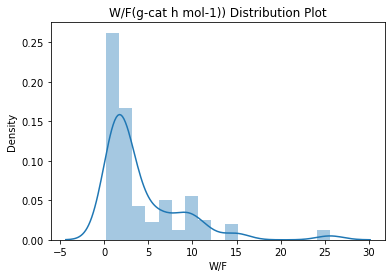

In [9]:
sns.distplot(Dataset['W/F'])
plt.title('W/F(g-cat h mol-1)) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BET Surface Area(m2/g) Distribution Plot')

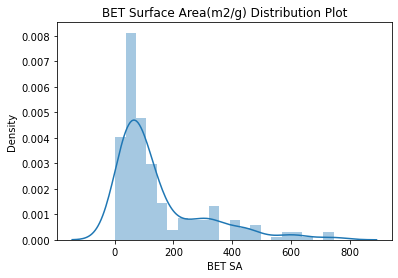

In [10]:
sns.distplot(Dataset['BET SA'])
plt.title('BET Surface Area(m2/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pore Volume(cm3/g) Distribution Plot')

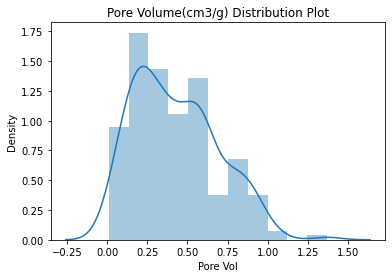

In [11]:
sns.distplot(Dataset['Pore Vol'])
plt.title('Pore Volume(cm3/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pore Size(nm) Distribution Plot')

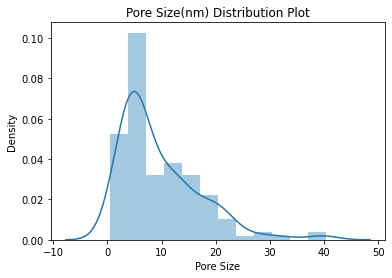

In [12]:
sns.distplot(Dataset['Pore Size'])
plt.title('Pore Size(nm) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crystal Size(nm) Distribution Plot')

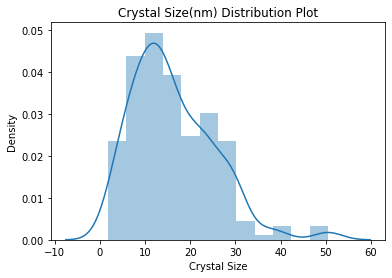

In [13]:
sns.distplot(Dataset['Crystal Size'])
plt.title('Crystal Size(nm) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Metal Surface Area(m2/g) Distribution Plot')

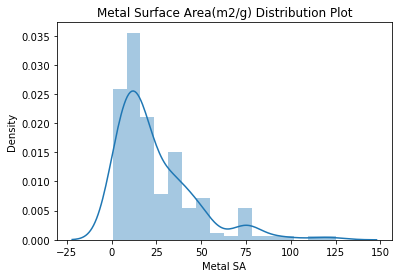

In [14]:
sns.distplot(Dataset['Metal SA'])
plt.title('Metal Surface Area(m2/g) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CO2 Conversion(%) Distribution Plot')

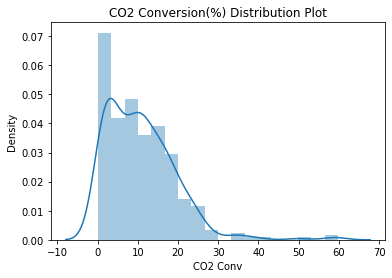

In [19]:
sns.distplot(Dataset['CO2 Conv'])
plt.title('CO2 Conversion(%) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Methanol STY(mol kg-cat−1 h−1) Distribution Plot')

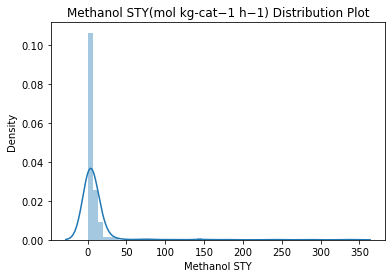

In [20]:
sns.distplot(Dataset['Methanol STY'])
plt.title('Methanol STY(mol kg-cat−1 h−1) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Methanol Selectivity(C-mol %) Distribution Plot')

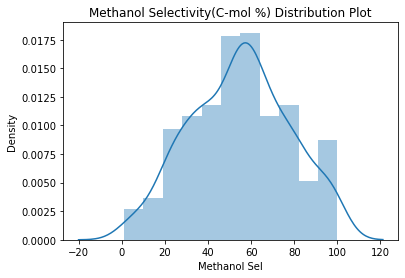

In [21]:
sns.distplot(Dataset['Methanol Sel'])
plt.title('Methanol Selectivity(C-mol %) Distribution Plot')

In [22]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [23]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.670,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.40,1.562500,54.2
1,3.03,513,4.0,SSIE,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,59.80,5.670000,73.9
2,3.03,533,3.0,SSIE,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,58.20,4.624200,62.5
3,3.03,513,3.0,SSIE,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,49.90,4.090000,64.5
4,3.03,513,2.0,SSIE,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,40.00,6.766200,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,IWI,2.99,84.0,0.38,6.755,14.1,16.9,0.0900,0.0000,0.0,0.9100,9.77,3.008875,24.0
364,4.00,573,4.0,IWI,2.99,84.0,0.38,6.755,14.8,16.9,0.0900,0.0415,0.0,0.8685,9.77,18.360000,61.0
365,4.00,573,4.0,IWI,2.99,84.0,0.38,6.755,9.8,16.9,0.0900,0.0830,0.0,0.8270,9.77,3.008875,42.0
366,4.00,573,4.0,IWI,2.99,84.0,0.38,6.755,16.8,16.9,0.0900,0.1660,0.0,0.7440,9.77,3.008875,23.0


# Label Encoding for Preparation Method

In [24]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

# PREPROCESSED DATASET

In [25]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.40,1.562500,54.2
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,59.80,5.670000,73.9
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,58.20,4.624200,62.5
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,49.90,4.090000,64.5
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,40.00,6.766200,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.1,16.9,0.0900,0.0000,0.0,0.9100,9.77,3.008875,24.0
364,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.8,16.9,0.0900,0.0415,0.0,0.8685,9.77,18.360000,61.0
365,4.00,573,4.0,9,2.99,84.0,0.38,6.755,9.8,16.9,0.0900,0.0830,0.0,0.8270,9.77,3.008875,42.0
366,4.00,573,4.0,9,2.99,84.0,0.38,6.755,16.8,16.9,0.0900,0.1660,0.0,0.7440,9.77,3.008875,23.0


# DATA ANALYSIS

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperature(K) Distribution Plot')

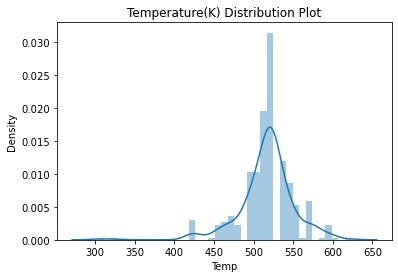

In [26]:
sns.distplot(Dataset['Temp'])
plt.title('Temperature(K) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pressure(MPa) Distribution Plot')

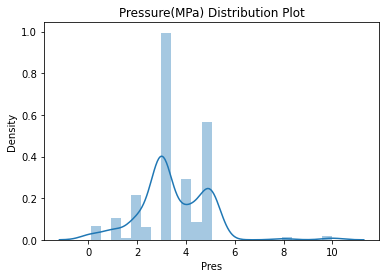

In [27]:
sns.distplot(Dataset['Pres'])
plt.title('Pressure(MPa) Distribution Plot')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'H2/CO2 Distribution Plot')

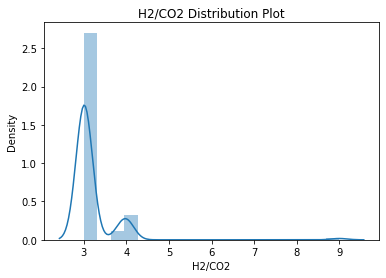

In [28]:
sns.distplot(Dataset['H2/CO2'])
plt.title('H2/CO2 Distribution Plot')

<AxesSubplot:xlabel='PrepM', ylabel='count'>

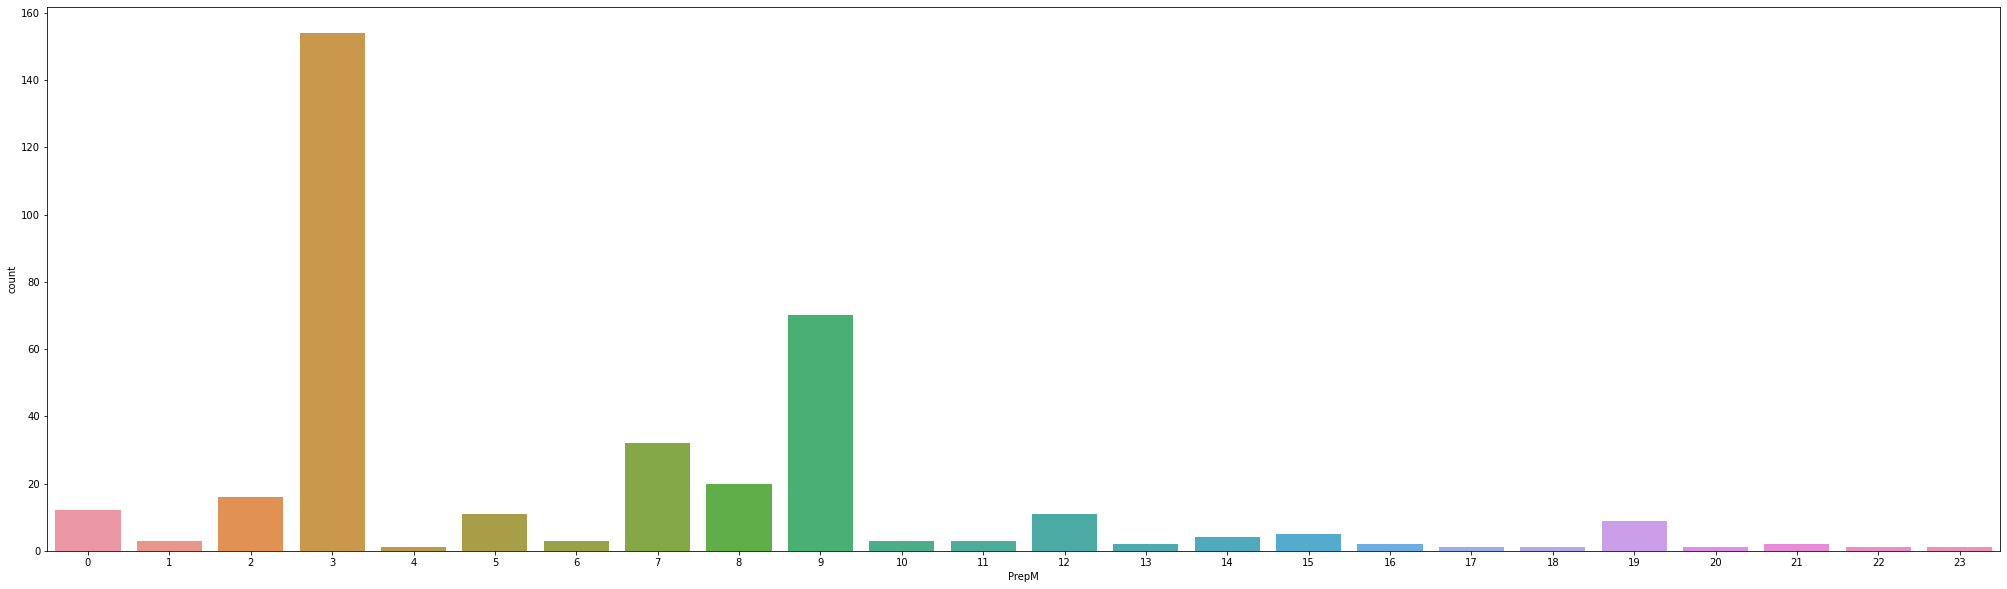

In [29]:
plt.figure(figsize=(35,10))
sns.countplot(x='PrepM',data=Dataset)

Text(0, 0.5, 'Methanol STY')

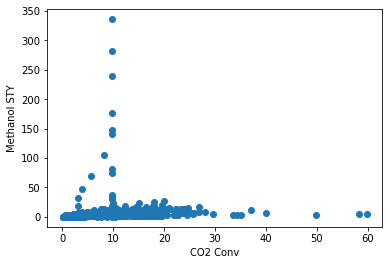

In [32]:
plt.scatter(Dataset['CO2 Conv'],Dataset['Methanol STY'])
plt.xlabel('CO2 Conv')
plt.ylabel('Methanol STY')

Text(0, 0.5, 'Methanol Sel')

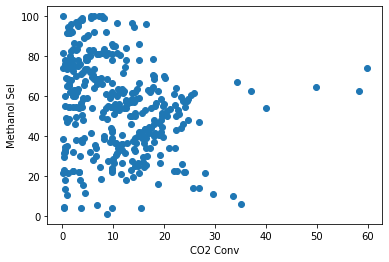

In [33]:
plt.scatter(Dataset['CO2 Conv'],Dataset['Methanol Sel'])
plt.xlabel('CO2 Conv')
plt.ylabel('Methanol Sel')

# CATALYST PROPERTY DATASET

In [30]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,0,1,2,3,0.1,1.1,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,0,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,1,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,2,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,4,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


# FINAL DATASET

In [31]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,...,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100
